## Import Libraries

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import os
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

%matplotlib inline
sns.set_style('whitegrid')

## Read Data

In [57]:
data = pd.read_csv("creditcard.csv")

### Dimensions of Data

In [58]:
data.shape

(284807, 31)

### Peak at the Data

In [59]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Attributes in Data

In [61]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Data types of Attributes

In [62]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

looks good, every feature has correct data type. lets check memory_usage of data.

In [63]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Describe the Data

In [64]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As we can see every features mean is near to zero and every feature has same count equall means we don't have missing. let's do more exploration.

### Exploratory Data Analysis

#### Distribution of Data

First we check distribution of class, It is equally distributed or not.

<AxesSubplot:xlabel='Class', ylabel='count'>

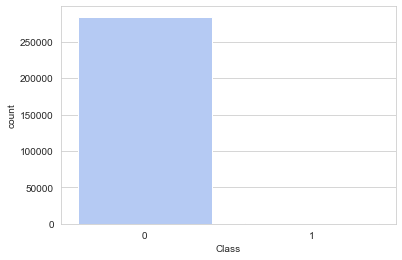

In [65]:
sns.countplot(x='Class',data=data,palette='coolwarm')

### Some Pre Processing

If we have any duplicate records then we will remove them and keep first.

In [66]:
data.duplicated().sum()

1081

We don't need time

In [67]:
data.pop('Time')

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

Convert amount to log-space

In [68]:
eps = 0.001
data['Log Ammount'] = np.log(data.pop('Amount')+eps)

Check The Null Values in Data

In [69]:
data.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Class          0
Log Ammount    0
dtype: int64

### Train Test Split

We will devide our Data into 2 Parts and then use Cross Validation on Training Data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1),data['Class'],train_size=0.70,random_state=10,stratify=data['Class'])

### Normalization

In [71]:
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = np.clip(X_train, -5, 5)
X_test = np.clip(X_test, -5, 5)

## Model Training

#### Model Defination

In [77]:
model= Sequential([
    Dense(units=16, kernel_initializer='uniform', input_dim=29, activation='relu'),
    Dense(units=18, kernel_initializer='uniform', activation='relu'),
    Dropout(0.5),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_11 (Dense)             (None, 18)                306       
_________________________________________________________________
dropout_2 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                380       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 25        
Total params: 1,695
Trainable params: 1,695
Non-trainable params: 0
____________________________________________________

##### Optimizer

In [79]:
opt = SGD(lr=0.01, momentum=0.9)

##### METRICS

In [84]:
METRICS = [ 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'),
]

#### Early Stopping

In [87]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

#### Class weights
We will use weighted loss for imblance problem.

In [89]:
neg, pos = np.bincount(data['Class'])
total = neg + pos

In [90]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

In [91]:
class_weight = {0: weight_for_0, 1: weight_for_1}

In [85]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)

In [93]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=2000, epochs=100,callbacks=[early_stopping], class_weight=class_weight)

Epoch 1/100
80/80 [==============================] - 1s 8ms/step - loss: 0.1895 - accuracy: 0.9771 - precision: 0.0655 - recall: 0.8815 - auc: 0.9693 - prc: 0.5524 - val_loss: 0.1343 - val_accuracy: 0.9799 - val_precision: 0.0612 - val_recall: 0.9123 - val_auc: 0.9888 - val_prc: 0.6105
Epoch 2/100
80/80 [==============================] - 1s 8ms/step - loss: 0.1823 - accuracy: 0.9728 - precision: 0.0569 - recall: 0.9059 - auc: 0.9761 - prc: 0.4332 - val_loss: 0.1400 - val_accuracy: 0.9759 - val_precision: 0.0506 - val_recall: 0.8947 - val_auc: 0.9815 - val_prc: 0.5485
Epoch 3/100
80/80 [==============================] - 1s 8ms/step - loss: 0.1842 - accuracy: 0.9762 - precision: 0.0641 - recall: 0.8990 - auc: 0.9748 - prc: 0.4693 - val_loss: 0.1567 - val_accuracy: 0.9714 - val_precision: 0.0446 - val_recall: 0.9298 - val_auc: 0.9813 - val_prc: 0.5861
Epoch 4/100
80/80 [==============================] - 1s 7ms/step - loss: 0.1739 - accuracy: 0.9712 - precision: 0.0538 - recall: 0.9059 - a

## Score on Testing Data

In [94]:
score = model.evaluate(X_test, y_test, batch_size=128)
print('\nAnd the Score is ', score[1] * 100, '%')

668/668 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.9864 - precision: 0.1023 - recall: 0.8851 - auc: 0.9900 - prc: 0.6829

And the Score is  98.63534569740295 %


### Confusion matrix

In [95]:
y_true = model.predict_classes(X_test)

In [96]:
cm = confusion_matrix(y_test,y_true)

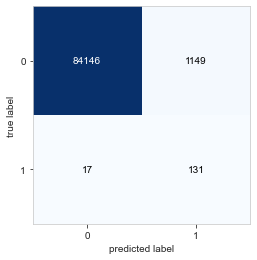

In [97]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

## classification Report

In [98]:
print(classification_report(y_test,y_true))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.89      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443

